### Here I'm implementing matrix calculations of green matrix

In [1]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell
from helper import Helper
from well import Well
import pandas as pd
from time import time

In [2]:
# define a well in real space
xwd = 0.
ywd = 0.
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 12
params = {"nseg": 20, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":10, "ref_length":1.,
         "z_ref_length": 1}
real_well = Well(xwd, ywd, outer_bound, top_bound, bottom_bound, wtype, params, n_stehf)
well = real_well.lapl_well

In [3]:
helper = Helper()

In [11]:
np.all(np.isclose(old_green, new_green, rtol=1e-5))

True

### here I checked that all is OK

In [13]:
ss = 1000*np.random.sample(1000)
ss = ss[ss > 0.]
t1 = time()
for s in ss:
    old_gr = helper.get_green_matrix(well, s)
print(time()-t1)
t1 = time()
for s in ss:
    new_gr = helper.dev_get_green_matrix(well, s)
print(time() - t1)

45.7176148891449
1.4930853843688965


### Here I checked that speed increased considerably

In [5]:
# reference data from the paper []
ref_df = pd.read_csv('./calibration_points.csv', sep=";", decimal=',')
y_trues = ref_df.iloc[:,1:]
ts = np.array(ref_df["Td_xf"])

In [6]:
# make predictions for reference Fcd's
predictions = None
for i in range(1, ref_df.shape[1]):
    y_true = ref_df.iloc[:,[i]]
    Fcd = float(y_true.columns[0].replace(',', '.'))
    real_well.params["Fcd"] = Fcd
    y = np.array([])
    for td in ts:
        y = np.append(y, real_well.get_pw(td))
    if predictions is None:
        predictions = y[np.newaxis]
    else:
        predictions = np.vstack([predictions, y])
    print("Fcd {} finished".format(Fcd))

Fcd 0.628318531 finished
Fcd 3.141592654 finished
Fcd 6.283185307 finished
Fcd 31.41592654 finished
Fcd 62.83185307 finished
Fcd 314.1592654 finished


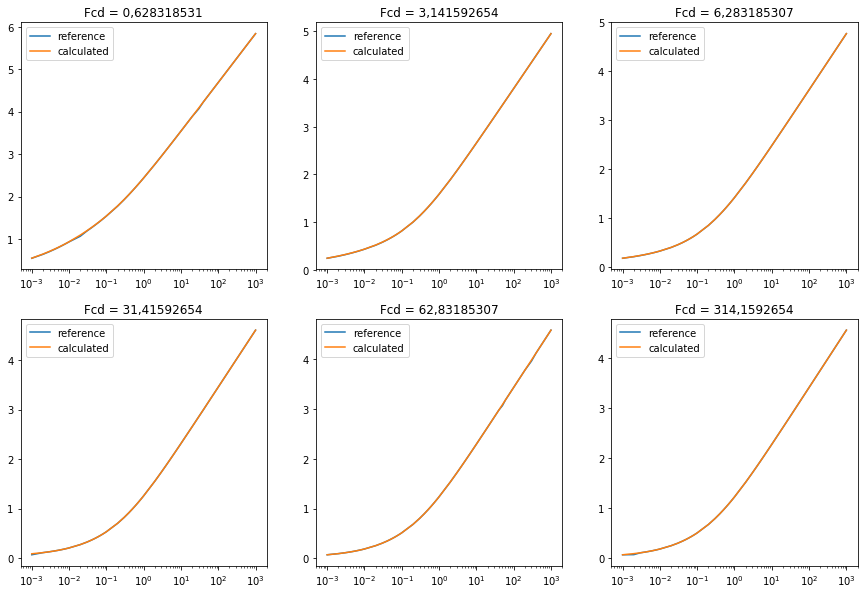

In [7]:
fig = plt.figure(figsize=(15,10))
n_plots = predictions.shape[0]
for i in range(n_plots):
    fig.add_subplot(2, n_plots//2, i+1)
    plt.xscale("log")
    y_true = y_trues.iloc[:,[i]]
    plt.title("Fcd = {}".format(y_true.columns[0]))
    plt.plot(ts, y_true, label="reference")
    plt.plot(ts, predictions[i,:], label="calculated")
    plt.legend()

In [8]:
len(ts)

55